In [25]:
from ml_dcs.config import config  # NOQA

SIMPLE_INPUT_PATH = "tmp/prod-results/results-20241214/20241125_memory-usage_CM/simple/20241214-052816/testing-result_DT.json"
GNN_INPUT_PATH_L1 = "tmp/prod-results/results-20241214/20241125_memory-usage_CM/gnn-L1/20241214-053947/testing-result.json"
GNN_INPUT_PATH_L2 = "tmp/prod-results/results-20241214/20241125_memory-usage_CM/gnn-L2/20241214-064546/testing-result.json"
GNN_INPUT_PATH_L3 = "tmp/prod-results/results-20241214/20241125_memory-usage_CM/gnn-L3/20241214-080124/testing-result.json"
X_LABEL = "Actual values (MB)"
Y_LABEL = "Predicted values (MB)"
ORDER_OF_MAG = 3
LIM = (-1 * 10**ORDER_OF_MAG, 8 * 10**ORDER_OF_MAG)

{
  "algorithm": "Decision Tree",
  "results": [
    {
      "algorithm": "Decision Tree",
      "random_state": 42,
      "duration": "PT0.000184S",
      "mae": 2648189.2258320125,
      "mse": 7179539330695.56,
      "rmse": 2679466.2398872576,
      "r_squared": -1.7742499253515005
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Decision Tree",
    "random_state": 42,
    "lts_names": [
      "CM（2, 5）_000056",
      "CM（2, 5）_000061",
      "CM（2, 2）_000004",
      "CM（2, 4）_000155",
      "CM（2, 4）_000081",
      "CM（2, 5）_000007",
      "CM（2, 5）_000043",
      "CM（2, 3）_000102",
      "CM（3, 3）_000123",
      "CM（2, 4）_000175",
      "CM（2, 4）_000063",
      "CM（2, 5）_000052",
      "CM（3, 3）_000113",
      "CM（2, 2）_000028",
      "CM（2, 4）_000012",
      "CM（2, 4）_000107",
      "CM（2, 4）_000124",
      "CM（3, 3）_000065",
      "CM（2, 4）_000101",
      "CM（2, 5）_000137",
      "CM（2, 4）_000000",
      "CM（2, 3）_000100",
      "CM（2, 3）_000010",
      "CM（3, 2）_000

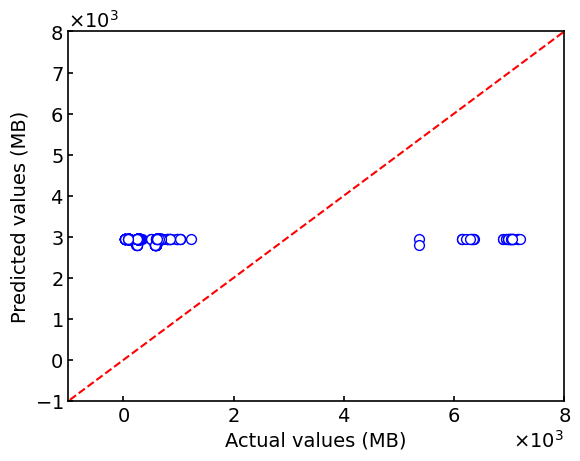

In [26]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH, "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG,
)
util = GraphUtil(graph)
util.show()

In [27]:
for index, actual_values in enumerate(data_model.result_at_best_accuracy.actual_values):
    if actual_values > 0.6 * 10**4 * 1000:
        print(data_model.result_at_best_accuracy.lts_names[index])

CM（3, 3）_000123
CM（3, 3）_000113
CM（3, 3）_000065
CM（3, 3）_000099
CM（3, 3）_000125
CM（3, 3）_000117
CM（3, 3）_000086
CM（3, 3）_000070
CM（3, 3）_000103
CM（3, 3）_000088
CM（3, 3）_000082
CM（3, 3）_000072
CM（3, 3）_000111
CM（3, 3）_000098
CM（3, 3）_000121
CM（3, 3）_000101
CM（3, 3）_000096
CM（3, 3）_000064
CM（3, 3）_000104
CM（3, 3）_000092
CM（3, 3）_000115
CM（3, 3）_000124
CM（3, 3）_000066
CM（3, 3）_000119
CM（3, 3）_000078
CM（3, 3）_000118
CM（3, 3）_000120
CM（3, 3）_000100
CM（3, 3）_000116
CM（3, 3）_000071
CM（3, 3）_000076
CM（3, 3）_000114
CM（3, 3）_000087
CM（3, 3）_000105
CM（3, 3）_000108
CM（3, 3）_000110
CM（3, 3）_000106
CM（3, 3）_000102
CM（3, 3）_000107
CM（3, 3）_000112


{
  "task_results": [
    {
      "lts_name": "CM（2, 5）_000056",
      "loss": 428634144768.0,
      "actual": 655233.0,
      "predicted": 531.4284057617188,
      "started_at": "2024-12-14T06:35:38.159357",
      "finished_at": "2024-12-14T06:35:38.160734",
      "duration": "PT0.001377S"
    },
    {
      "lts_name": "CM（2, 5）_000061",
      "loss": 333175357440.0,
      "actual": 577554.0,
      "predicted": 340.5325927734375,
      "started_at": "2024-12-14T06:35:38.162276",
      "finished_at": "2024-12-14T06:35:38.164191",
      "duration": "PT0.001915S"
    },
    {
      "lts_name": "CM（2, 2）_000004",
      "loss": 986429184.0,
      "actual": 31374.0,
      "predicted": -33.470458984375,
      "started_at": "2024-12-14T06:35:38.164545",
      "finished_at": "2024-12-14T06:35:38.165807",
      "duration": "PT0.001262S"
    },
    {
      "lts_name": "CM（2, 4）_000155",
      "loss": 85938700288.0,
      "actual": 293237.0,
      "predicted": 83.982666015625,
      "started_at"

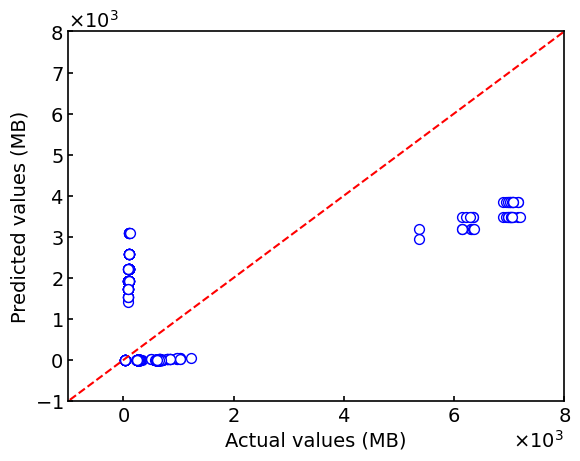

In [28]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L1, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG,
)
util = GraphUtil(graph)
util.show()

{
  "task_results": [
    {
      "lts_name": "CM（2, 5）_000056",
      "loss": 340895203328.0,
      "actual": 655233.0,
      "predicted": 71370.6640625,
      "started_at": "2024-12-14T07:51:14.154799",
      "finished_at": "2024-12-14T07:51:14.156822",
      "duration": "PT0.002023S"
    },
    {
      "lts_name": "CM（2, 5）_000061",
      "loss": 283372027904.0,
      "actual": 577554.0,
      "predicted": 45226.9921875,
      "started_at": "2024-12-14T07:51:14.157193",
      "finished_at": "2024-12-14T07:51:14.159195",
      "duration": "PT0.002002S"
    },
    {
      "lts_name": "CM（2, 2）_000004",
      "loss": 3078853888.0,
      "actual": 31374.0,
      "predicted": -24113.421875,
      "started_at": "2024-12-14T07:51:14.159546",
      "finished_at": "2024-12-14T07:51:14.167401",
      "duration": "PT0.007855S"
    },
    {
      "lts_name": "CM（2, 4）_000155",
      "loss": 67036573696.0,
      "actual": 293237.0,
      "predicted": 34322.78125,
      "started_at": "2024-12-14T

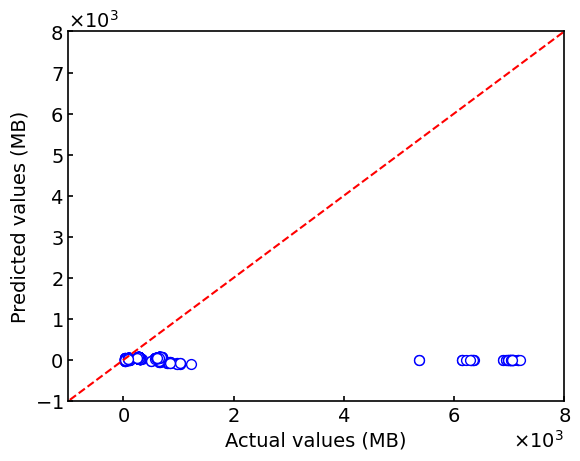

In [29]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L2, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG,
)
util = GraphUtil(graph)
util.show()

{
  "task_results": [
    {
      "lts_name": "CM（2, 5）_000056",
      "loss": 316700655616.0,
      "actual": 655233.0,
      "predicted": 92471.34375,
      "started_at": "2024-12-14T08:09:15.638766",
      "finished_at": "2024-12-14T08:09:15.641701",
      "duration": "PT0.002935S"
    },
    {
      "lts_name": "CM（2, 5）_000061",
      "loss": 16755991552.0,
      "actual": 577554.0,
      "predicted": 706998.9375,
      "started_at": "2024-12-14T08:09:15.642085",
      "finished_at": "2024-12-14T08:09:15.649128",
      "duration": "PT0.007043S"
    },
    {
      "lts_name": "CM（2, 2）_000004",
      "loss": 1002458.5625,
      "actual": 31374.0,
      "predicted": 32375.228515625,
      "started_at": "2024-12-14T08:09:15.653592",
      "finished_at": "2024-12-14T08:09:15.656405",
      "duration": "PT0.002813S"
    },
    {
      "lts_name": "CM（2, 4）_000155",
      "loss": 73058795520.0,
      "actual": 293237.0,
      "predicted": 22943.09765625,
      "started_at": "2024-12-14T

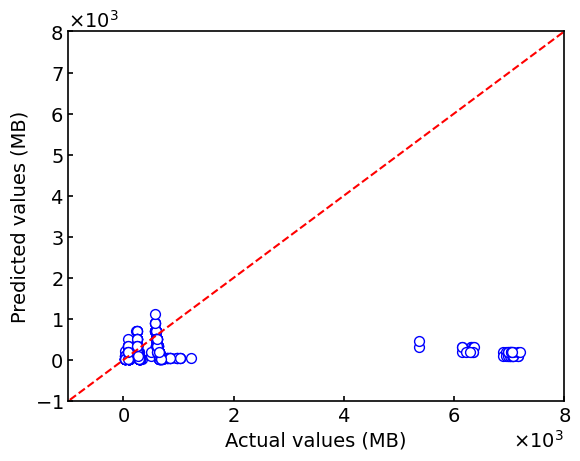

In [30]:
import json
from ml_dcs.internal.graph.graph import GraphUtil
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L3, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG,
)
util = GraphUtil(graph)
util.show()